In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import datetime as dt
import yfinance as yf
# %matplotlib widget


BETA = covariance / variance

In [3]:
start = dt.datetime(2020, 10, 20)

simbol1 = "SPY"
simbol2 = "COF"
ticker1 = yf.Ticker(simbol1)
ticker2 = yf.Ticker(simbol2)
stock_data1 = ticker1.history(start=start, actions=False, rounding=True)
stock_data2 = ticker2.history(start=start, actions=False, rounding=True)

In [4]:
stock_data = pd.concat([stock_data1.Close, stock_data2.Close], axis=1)

In [5]:
stock_data.columns = [simbol1,simbol2]

In [6]:
stock_data

,SPY,COF
Date,,
2020-10-20 00:00:00-04:00,327.07,72.62
2020-10-21 00:00:00-04:00,326.45,69.29
2020-10-22 00:00:00-04:00,328.24,72.14
2020-10-23 00:00:00-04:00,329.35,73.30
2020-10-26 00:00:00-04:00,323.27,70.44
...,...,...
2023-12-29 00:00:00-05:00,475.31,131.12
2024-01-02 00:00:00-05:00,472.65,132.11
2024-01-03 00:00:00-05:00,468.79,130.72


In [7]:
close_data_pct = np.log(stock_data/stock_data.shift())

In [8]:
close_data_pct.head()

,SPY,COF
Date,,
2020-10-20 00:00:00-04:00,NaN,NaN
2020-10-21 00:00:00-04:00,-0.001897,-0.046940
2020-10-22 00:00:00-04:00,0.005468,0.040308
2020-10-23 00:00:00-04:00,0.003376,0.015952
2020-10-26 00:00:00-04:00,-0.018633,-0.039799


In [9]:
covariance = close_data_pct.cov().iloc[0,1]
covariance

0.00015869666905007077

In [10]:
variance = close_data_pct["SPY"].var()
variance

0.00012116705282134718

In [11]:
BETA = covariance/variance
BETA

1.3097344975787975

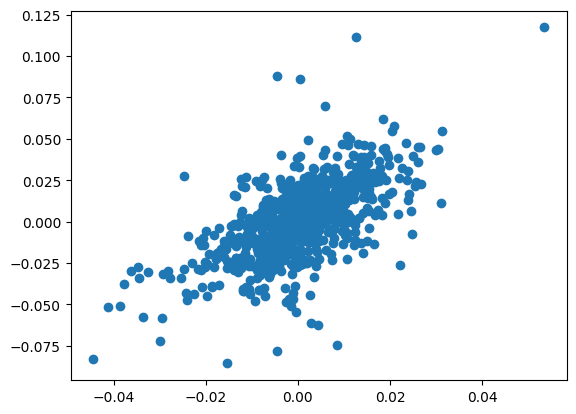

In [12]:
fig1, ax1 = plt.subplots()
ax1.scatter(close_data_pct.SPY, close_data_pct.COF);

Linear regression:

In [13]:
X = close_data_pct['SPY'].iloc[1:].values.reshape(-1,1)
Y = close_data_pct['COF'].iloc[1:].values.reshape(-1,1)

regression = linear_model.LinearRegression()
regression.fit(X,Y)
regression.coef_
# regression coeficient value is the same as beta value

array([[1.3097345]])